<a href="https://colab.research.google.com/github/Akshaylalta/BigMart-Sales-Analysis-and-Prediction/blob/Project/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries** 

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#**Load Training and Testing Data**

In [274]:
train=pd.read_csv('/content/Train.csv')
test=pd.read_csv('/content/Test.csv')
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [275]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


#Basic Informations of Data

In [276]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [277]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [278]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [279]:
train['source'] = 'train'
test['source']='test'
test['Item_Outlet_Sales']=0
df = pd.concat([train, test], sort = False)
print(train.shape, test.shape, df.shape)

(8523, 13) (5681, 13) (14204, 13)


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

In [281]:
#Statistics analysis of Data
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [282]:
#Categorical Features
df.select_dtypes(include=object)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,train
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train
...,...,...,...,...,...,...,...,...
5676,FDB58,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1,test
5677,FDD47,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2,test
5678,NCO17,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1,test
5679,FDJ26,Regular,Canned,OUT017,NaN,Tier 2,Supermarket Type1,test


In [283]:
#Numerical Features
df.select_dtypes(include=[int,float])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
5676,10.50,0.013496,141.3154,1997,0.0000
5677,7.60,0.142991,169.1448,2009,0.0000
5678,10.00,0.073529,118.7440,2002,0.0000
5679,15.30,0.000000,214.6218,2007,0.0000


In [284]:
#No of unique values in all columns
df.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

* This tells us that there are 1559 products and 10 outlets

# **Data Cleaning**

In [285]:
#Checking for missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [286]:
#Filling the missing values of numerical column with mean
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [287]:
#Filling the missing values of categorical columns with mode
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [288]:
#Rechecking for missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [289]:
#Checking for duplicated values
df.duplicated().sum()

0

In [290]:
#replace o with mean of columns
df['Item_Visibility'].replace(0,df['Item_Visibility'].mean(),inplace=True)

* Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.So replace it with mean of column


In [291]:
#Showing unique values of categorical features
for col in df.select_dtypes(include=object).columns[1:]:
 print(col,':',df[col].unique())

Item_Fat_Content : ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier : ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size : ['Medium' 'High' 'Small']
Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
source : ['train' 'test']


In [292]:
# In Item fat content feature there is some spelling error
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [293]:
#Replace it with correct values
df['Item_Fat_Content'].replace({'low fat':'Low Fat',
                                'LF':'Low Fat','reg':'Regular'},inplace=True)

In [294]:
#Recheck the unique values
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

# **Exploratory Data Analysis(EDA)**

Visualizing Target Features

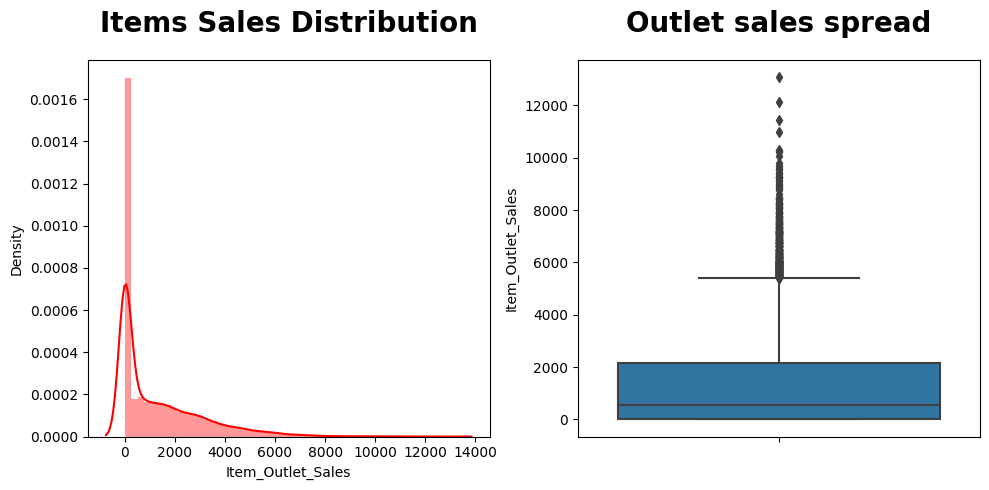

In [295]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['Item_Outlet_Sales'],color="red")
plt.title('Items Sales Distribution',fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df['Item_Outlet_Sales'])
plt.title('Outlet sales spread',fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()


# *Categorical Visualization*

Visualizing Total No. of Sales in Different Outlet

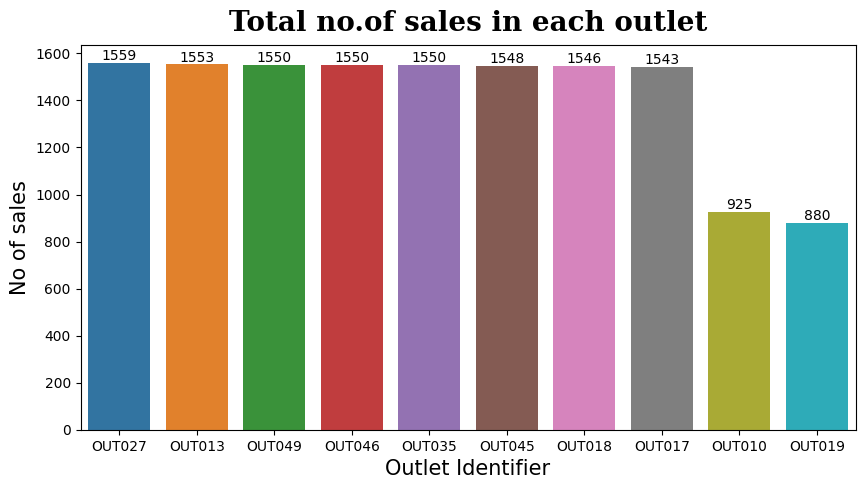

In [296]:
plt.figure(figsize=(10,5))
counts=df['Outlet_Identifier'].value_counts()
ax=sns.barplot(x=counts.index,y=counts.values)
ax.bar_label(ax.containers[0])
plt.xlabel('Outlet Identifier',fontsize=15)
plt.ylabel('No of sales',fontsize=15,)
plt.title('Total no.of sales in each outlet',family='Serif',fontsize=20,fontweight='black',pad=10)
plt.show()

* Most no.of sales held in OUT27 and least no.of sales held in OUT19

Visualizing Outlet w.r.to Item Outlet Sales

[]

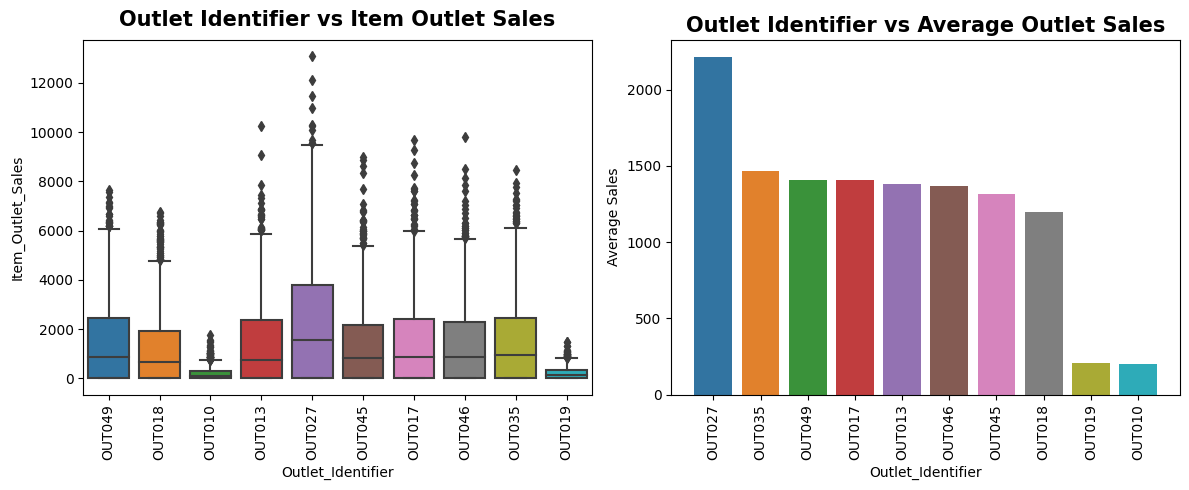

In [297]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df['Outlet_Identifier'],y=df['Item_Outlet_Sales'])
plt.xticks(rotation=90)
plt.title('Outlet Identifier vs Item Outlet Sales', pad=10, fontweight="black", fontsize=15)

plt.subplot(1,2,2)
x=df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
sns.barplot(x=x.index,y=x.values)
plt.xticks(rotation=90)
plt.ylabel('Average Sales')
plt.title('Outlet Identifier vs Average Outlet Sales',fontweight='bold',fontsize=15)
plt.tight_layout()
plt.plot()

* In OUT27 sales held in all price range
* Most average outlet sales held in OUT27 and least in OUT10

Top 10 items of highest sales in outlets

[]

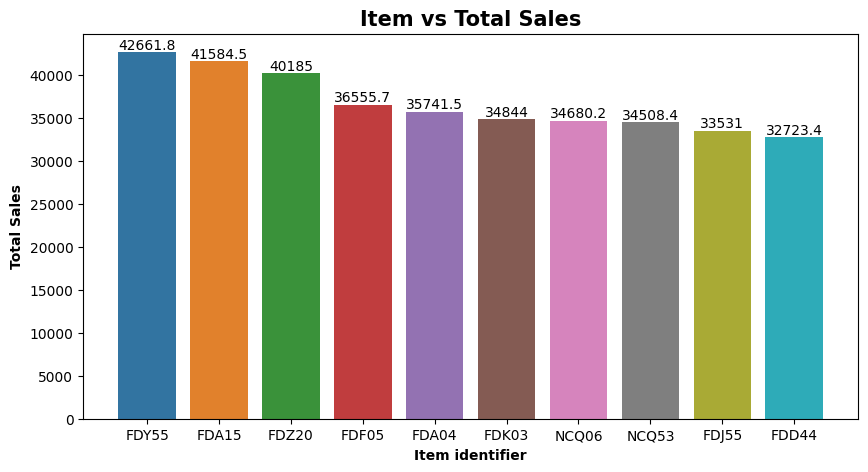

In [298]:
plt.figure(figsize=(10,5))
Item_sales=df.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending = False)[:10]
ax=sns.barplot(x=Item_sales.index,y=Item_sales.values)
ax.bar_label(ax.containers[0])
plt.title('Item vs Total Sales',fontsize=15,fontweight='bold')
plt.xlabel('Item identifier',fontweight='black')
plt.ylabel('Total Sales',fontweight='black')
plt.plot()

* Item identifier FDY55 has highest sum of sales

Visualizing Item Fat Content Feature

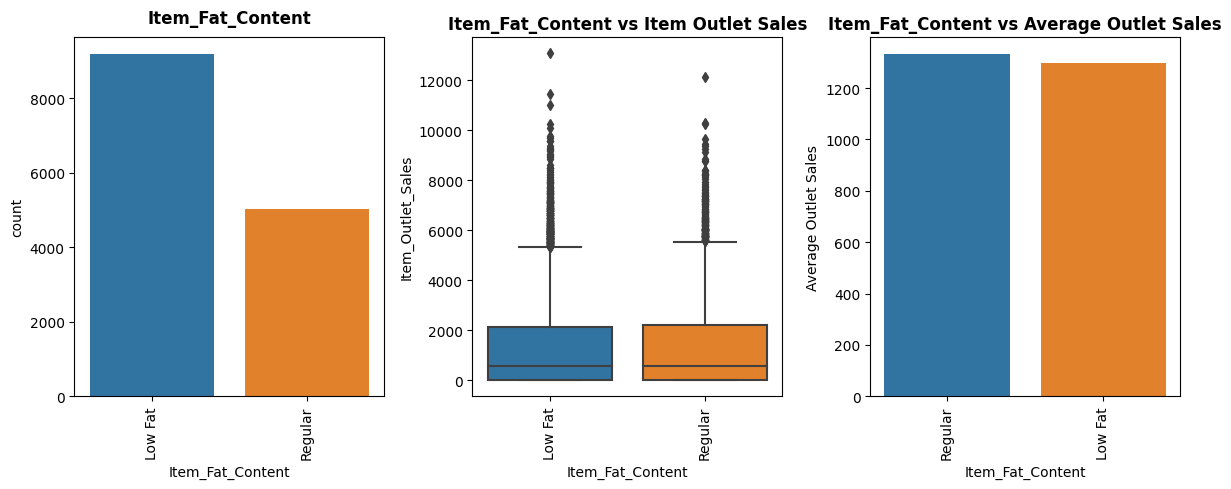

In [299]:
def categorical_visualization(col):
  
  plt.figure(figsize=(12,5))
  
  plt.subplot(1,3,1)
  sns.countplot(x=df[col])
  plt.title(f"{col}",fontweight='black',pad=10)
  plt.xticks(rotation=90)


  plt.subplot(1,3,2)
  sns.boxplot(x=df[col],y=df['Item_Outlet_Sales'])
  plt.title(f"{col} vs Item Outlet Sales",fontweight="black")
  plt.xticks(rotation=90)
  

  plt.subplot(1,3,3)
  x=df.groupby(col)['Item_Outlet_Sales'].mean().sort_values(ascending=False)
  sns.barplot(x=x.index,y=x.values)
  plt.ylabel('Average Outlet Sales')
  plt.xticks(rotation=90)
  plt.title(f"{col} vs Average Outlet Sales",fontweight='black')
  plt.tight_layout()
  plt.plot()

categorical_visualization('Item_Fat_Content')

* Low fat content items is most sold by outlets
* Both are sold in every sales range
* Average price of regular fat content items is slightly greater than the low fat content items

Visualizing Item Type Features

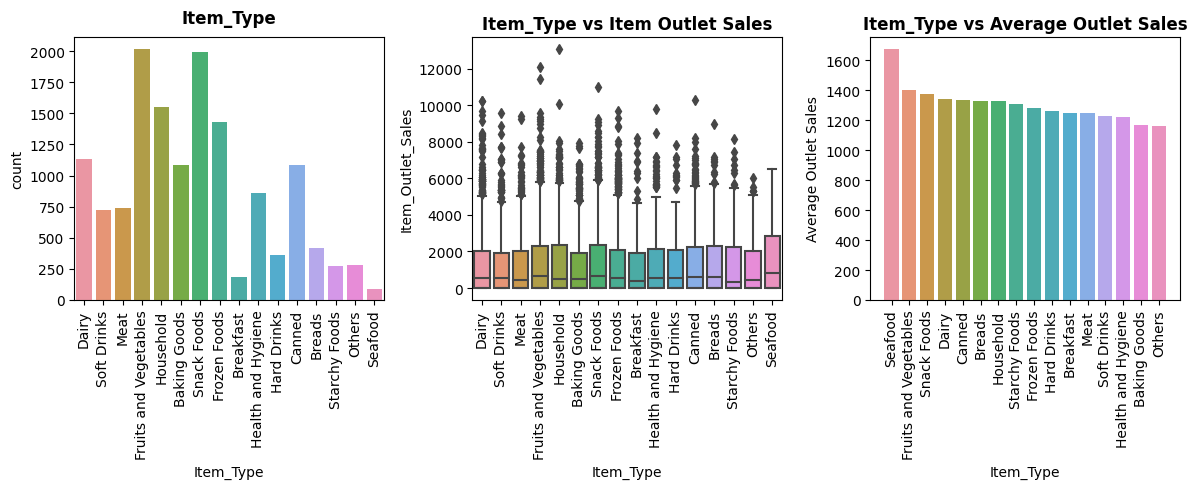

In [300]:
categorical_visualization('Item_Type')

* Fruits and Vegetables & Frozen Foods are most sold in outlets
* Fruits and Vegetables are sold in every range of sales 
* Starchy foods types have more average outlet sales

Visualizing Outlet Size feature

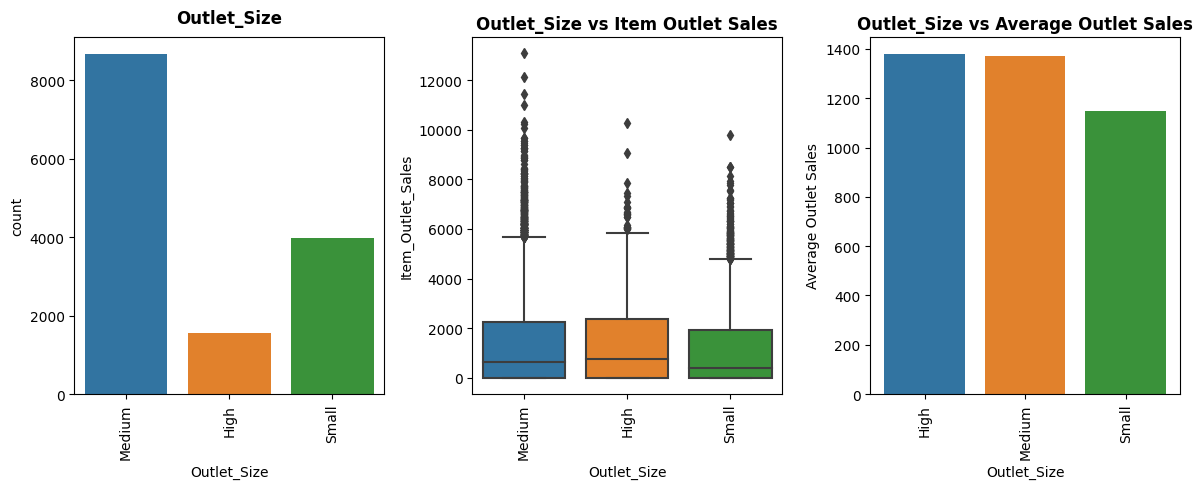

In [301]:
categorical_visualization('Outlet_Size')

* Most no. of sales held in medium size outlets
* Medium size outlets have in every sales range
* High and medium size outlets almost same averge sales

Visualize Outlet Location Type Features

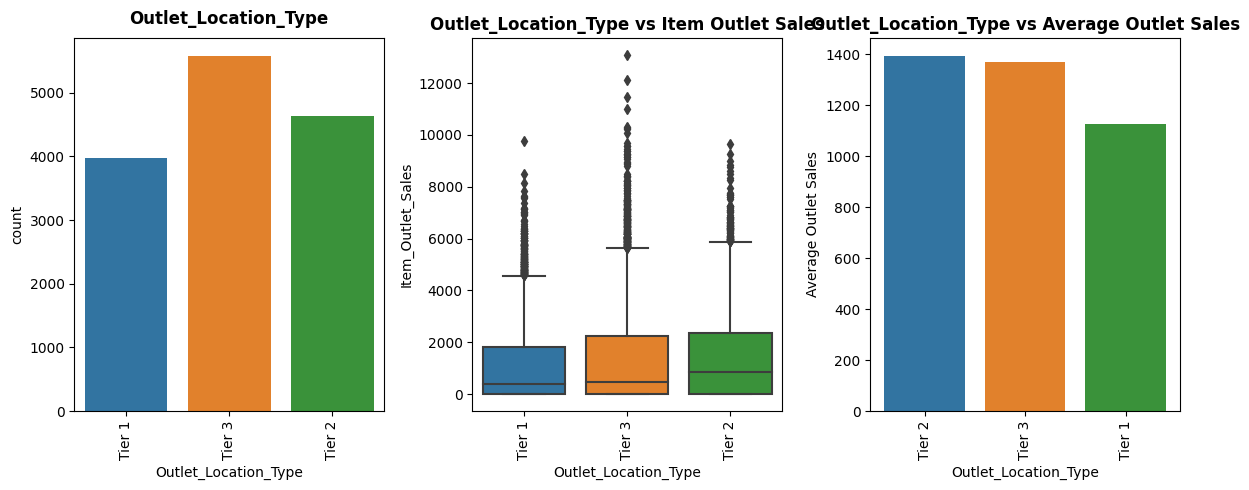

In [302]:
categorical_visualization('Outlet_Location_Type')

* Most sales held  in Tier 3 location type
* Tier 3 location type are in every sales range
* Tier 2 is slightly more average sales than Tier 3 location type

Visualizing Outlet Type Feature

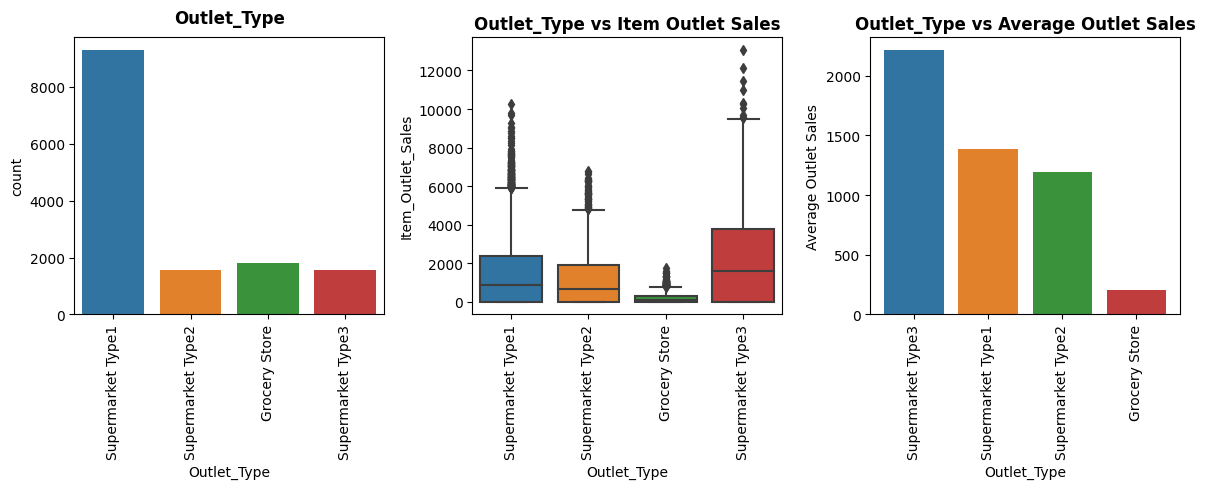

In [303]:
categorical_visualization('Outlet_Type')

* Supermarket Type1 have most no.of sales
* Supermarket Type3 are in every sales range
* Supermarket Type3 have most average outlet sales

Visualizing Outlet Establishment Year Feature

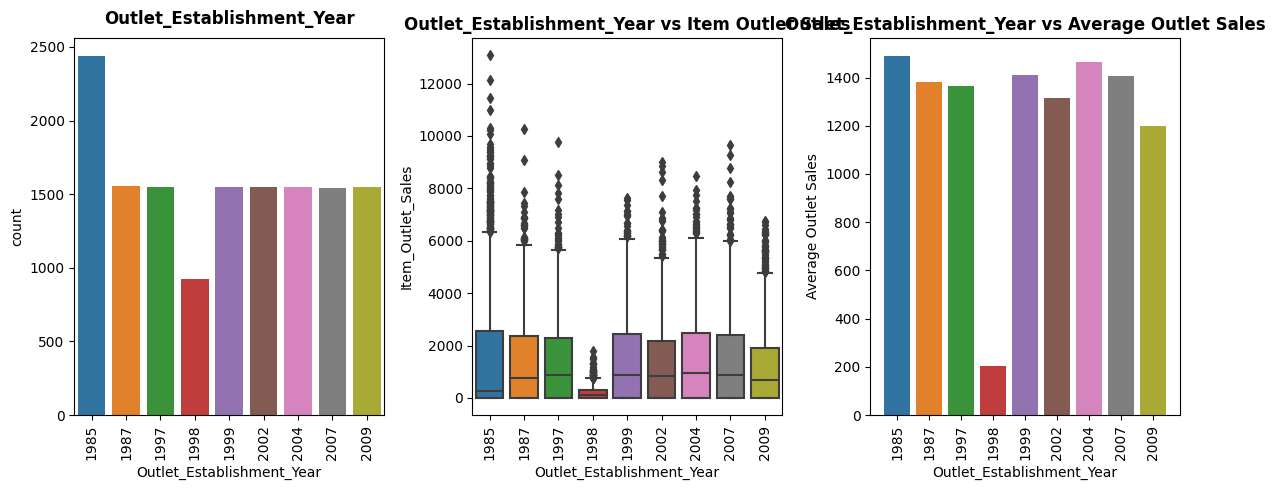

In [304]:
categorical_visualization('Outlet_Establishment_Year')

* In the year 1985 more oultet are established
* Outlet established in 1985 have most sales range
* Outlet established in 1985 and 2004 have highest average sales

#Numerical Visualization

[]

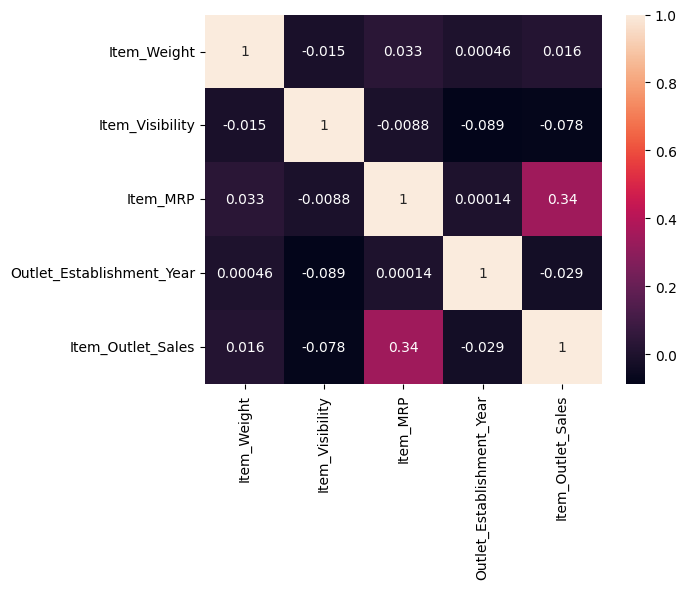

In [305]:
# Correlation between numerical features
sns.heatmap(df.corr(), annot=True)
plt.plot()

* There is slightly positive relation between Item MRP and Item Outlet Sales

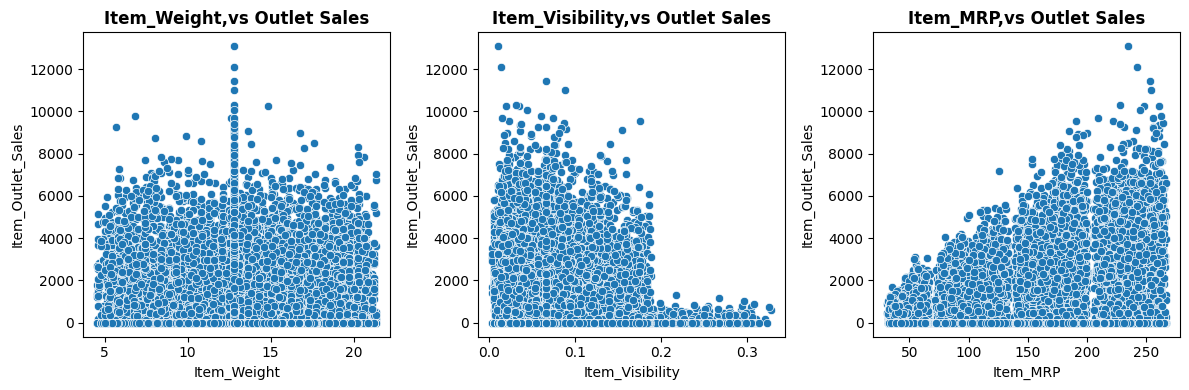

In [306]:
def regressionplot(columns):
  x=1
  plt.figure(figsize=(12,4))
  for col in columns:
    plt.subplot(1,3,x)
    sns.scatterplot(x=df[col],y=df['Item_Outlet_Sales'])
    plt.title(f"{col},vs Outlet Sales",fontweight='black')
    plt.tight_layout()
    x+=1

regressionplot(['Item_Weight','Item_Visibility','Item_MRP'])

* Outlet sales doesn't depend on item weight
* Item visibility increases 0 to greater sales decreases
* Item MRP increases sales increases

#**Data Preprocessing**

#Encoding categorical columns using get dummies and Label Encoder

In [307]:
#Encoding using get dummies
df=pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Size',
                              'Outlet_Location_Type','Outlet_Type'],drop_first=True)
df

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,1,1,0,0,1,0,1,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,1,1,0,0,1,0,0,0
4,NCD19,8.93,0.065953,Household,53.8614,OUT013,1987,994.7052,train,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,0.013496,Snack Foods,141.3154,OUT046,1997,0.0000,test,1,0,1,0,0,1,0,0
5677,FDD47,7.60,0.142991,Starchy Foods,169.1448,OUT018,2009,0.0000,test,1,1,0,0,1,0,1,0
5678,NCO17,10.00,0.073529,Health and Hygiene,118.7440,OUT045,2002,0.0000,test,0,1,0,1,0,1,0,0
5679,FDJ26,15.30,0.065953,Canned,214.6218,OUT017,2007,0.0000,test,1,1,0,1,0,1,0,0


In [308]:
#Encoding using Labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Enc_col=['Item_Identifier','Item_Type','Outlet_Identifier']
for col in Enc_col:
  df[col]=le.fit_transform(df[col])
df

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.30,0.016047,4,249.8092,9,1999,3735.1380,train,0,1,0,0,0,1,0,0
1,8,5.92,0.019278,14,48.2692,3,2009,443.4228,train,1,1,0,0,1,0,1,0
2,662,17.50,0.016760,10,141.6180,9,1999,2097.2700,train,0,1,0,0,0,1,0,0
3,1121,19.20,0.065953,6,182.0950,0,1998,732.3800,train,1,1,0,0,1,0,0,0
4,1297,8.93,0.065953,9,53.8614,1,1987,994.7052,train,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,233,10.50,0.013496,13,141.3154,8,1997,0.0000,test,1,0,1,0,0,1,0,0
5677,308,7.60,0.142991,15,169.1448,3,2009,0.0000,test,1,1,0,0,1,0,1,0
5678,1426,10.00,0.073529,8,118.7440,7,2002,0.0000,test,0,1,0,1,0,1,0,0
5679,521,15.30,0.065953,3,214.6218,2,2007,0.0000,test,1,1,0,1,0,1,0,0


In [309]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import make_column_transformer
# ohe=OneHotEncoder(handle_unknown='ignore')
# ct=make_column_transformer((ohe,['Item_Fat_Content','Outlet_Size',
#                               'Outlet_Location_Type','Outlet_Type']),remainder='passthrough')

In [310]:
#data types of all columns
df.dtypes

Item_Identifier                    int64
Item_Weight                      float64
Item_Visibility                  float64
Item_Type                          int64
Item_MRP                         float64
Outlet_Identifier                  int64
Outlet_Establishment_Year          int64
Item_Outlet_Sales                float64
source                            object
Item_Fat_Content_Regular           uint8
Outlet_Size_Medium                 uint8
Outlet_Size_Small                  uint8
Outlet_Location_Type_Tier 2        uint8
Outlet_Location_Type_Tier 3        uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
dtype: object

In [311]:
#Divide into test and train data
train=df.loc[df['source']=='train']
test=df.loc[df['source']=='test']

#Remove unnecessary columns
train.drop(['source'],axis=1,inplace=True)
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.300,0.016047,4,249.8092,9,1999,3735.1380,0,1,0,0,0,1,0,0
1,8,5.920,0.019278,14,48.2692,3,2009,443.4228,1,1,0,0,1,0,1,0
2,662,17.500,0.016760,10,141.6180,9,1999,2097.2700,0,1,0,0,0,1,0,0
3,1121,19.200,0.065953,6,182.0950,0,1998,732.3800,1,1,0,0,1,0,0,0
4,1297,8.930,0.065953,9,53.8614,1,1987,994.7052,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0.056783,13,214.5218,1,1987,2778.3834,0,0,0,0,1,1,0,0
8519,897,8.380,0.046982,0,108.1570,7,2002,549.2850,1,1,0,1,0,1,0,0
8520,1357,10.600,0.035186,8,85.1224,6,2004,1193.1136,0,0,1,1,0,1,0,0
8521,681,7.210,0.145221,13,103.1332,3,2009,1845.5976,1,1,0,0,1,0,1,0


In [312]:
test

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1114,20.750000,0.007565,13,107.8622,9,1999,0,1,0,0,0,1,0,0
1,1078,8.300000,0.038428,4,87.3198,2,2007,1,1,0,1,0,1,0,0
2,1420,14.600000,0.099575,11,241.7538,0,1998,0,1,0,0,1,0,0,0
3,817,7.315000,0.015388,13,155.0340,2,2007,0,1,0,1,0,1,0,0
4,1197,12.792854,0.118599,4,234.2300,5,1985,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,233,10.500000,0.013496,13,141.3154,8,1997,1,0,1,0,0,1,0,0
5677,308,7.600000,0.142991,15,169.1448,3,2009,1,1,0,0,1,0,1,0
5678,1426,10.000000,0.073529,8,118.7440,7,2002,0,1,0,1,0,1,0,0
5679,521,15.300000,0.065953,3,214.6218,2,2007,1,1,0,1,0,1,0,0


#Split into input and output label

In [313]:
x=train.drop(['Item_Outlet_Sales'],axis=1)
y=train['Item_Outlet_Sales']
x

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.300,0.016047,4,249.8092,9,1999,0,1,0,0,0,1,0,0
1,8,5.920,0.019278,14,48.2692,3,2009,1,1,0,0,1,0,1,0
2,662,17.500,0.016760,10,141.6180,9,1999,0,1,0,0,0,1,0,0
3,1121,19.200,0.065953,6,182.0950,0,1998,1,1,0,0,1,0,0,0
4,1297,8.930,0.065953,9,53.8614,1,1987,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0.056783,13,214.5218,1,1987,0,0,0,0,1,1,0,0
8519,897,8.380,0.046982,0,108.1570,7,2002,1,1,0,1,0,1,0,0
8520,1357,10.600,0.035186,8,85.1224,6,2004,0,0,1,1,0,1,0,0
8521,681,7.210,0.145221,13,103.1332,3,2009,1,1,0,0,1,0,1,0


In [314]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [315]:
x.shape,y.shape

((8523, 15), (8523,))

#Splting Data for model training and testing

In [316]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
x_train

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1945,1316,18.350000,0.089345,9,191.9504,3,2009,0,1,0,0,1,0,1,0
1720,1320,17.350000,0.168065,9,176.2712,3,2009,0,1,0,0,1,0,1,0
1954,621,10.100000,0.053887,6,225.6088,2,2007,1,1,0,1,0,1,0,0
1919,801,10.850000,0.162904,13,104.9622,3,2009,0,1,0,0,1,0,1,0
2461,383,7.170000,0.059717,6,130.9968,6,2004,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,634,12.792854,0.277459,10,156.3946,4,1985,1,0,1,0,0,0,0,0
7813,1048,12.792854,0.178193,4,54.9956,4,1985,0,0,1,0,0,0,0,0
905,1130,17.850000,0.065810,5,149.1050,8,1997,0,0,1,0,0,1,0,0
5192,1425,9.600000,0.049618,9,44.2086,0,1998,0,1,0,0,1,0,0,0


#**Model Building**

#Creating model using Linear Regression

In [318]:
from sklearn.linear_model import LinearRegression
model_LR=LinearRegression()
model_LR.fit(x_train,y_train)
y_pred=model_LR.predict(x_test)

In [333]:
from sklearn.model_selection import cross_val_score
def rmse(model):
  rmse=np.sqrt(-cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=10))
  return rmse.mean()


In [320]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error,mean_squared_error

print('r2 score of testing data',r2_score(y_test,y_pred))
print('% error of testing data',mean_absolute_percentage_error(y_test,y_pred))

r2 score of testing data 0.5615471357160694
% error of testing data 1.1143943474105873


In [321]:
y_train_pred=model_LR.predict(x_train)

print('r2 score of training data',r2_score(y_train,y_train_pred))
print('% error of training data',mean_absolute_percentage_error(y_train,y_train_pred))

r2 score of training data 0.5636299099545425
% error of training data 1.0193268895572503


In [334]:
print('rmse of Linear Regression',rmse(model_LR))

rmse of Linear Regression 1125.768820820512


#Creating model using Regularized Linear Regression

In [326]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet


#Ridge regularization
ridge = Ridge(alpha = 0.14) 
ridge.fit(x_train, y_train)
ridge_pred=ridge.predict(x_test)
print('r2 score',r2_score(y_test,ridge_pred))
print('rmse of ridge',rmse(ridge))


r2 score 0.5614962154964678
rmse of ridge 1125.7581088371335


In [327]:
#Lasso regularization
lasso = Lasso(alpha=0.00005)
lasso.fit(x_train, y_train)
lasso_pred=lasso.predict(x_test)
print('r2 score ',r2_score(y_test,lasso_pred))
print('rmse of lasso',rmse(lasso))


r2 score  0.5614593197588097
rmse of lasso 1125.7540175162444


In [328]:
#Elastic Net
elasticnet = ElasticNet(alpha=0.000005)
elasticnet.fit(x_train, y_train)
elasticnet_pred=elasticnet.predict(x_test)
print('r2 score',r2_score(y_test,elasticnet_pred))
print('rmse of elasticnet',rmse(elasticnet))

r2 score 0.5614551720182784
rmse of elasticnet 1125.7538681910569


#Creating model using Random Forest Regressor

In [354]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model_RF=RandomForestRegressor(n_estimators=10,max_depth=5,random_state=1)
model_RF.fit(x_train,y_train)
RF_pred=model_RF.predict(x_test)
print('r2 score',r2_score(y_test,RF_pred))
print('% error ',mean_absolute_percentage_error(y_test,RF_pred))
print('rmse of RandomForestRegrssor',rmse(model_RF))


r2 score 0.5961491055196693
% error  0.5665597274645376
rmse of RandomForestRegrssor 1080.3953640379077


#Creating model using XGBoost Regressor

In [355]:
from xgboost import XGBRegressor
model_XG=XGBRegressor(random_state = 33 , subsample = 0.7 , max_depth = 4 , reg_lambda = 15,gamma = 0 , learning_rate  = 0.07)
model_XG.fit(x_train,y_train)
XG_pred=model_XG.predict(x_test)
print('r2 score',r2_score(y_test,XG_pred))
print("% error",mean_absolute_percentage_error(y_test,XG_pred))
print('rmse of XGB',rmse(model_XG))

r2 score 0.5914646111194064
% error 0.6145370546478522
rmse of XGB 1076.660489934853


#**Summary**

* Random Forest Regressor model shows highest r2 score and lowest mean absolute percentage error
* Let's use Random Forest Regressor model to predict test data 

In [356]:
test_predict=model_RF.predict(test)
test_predict

array([1594.84089153, 1554.0958936 ,  550.10160724, ..., 2027.25001326,
       3679.55327188, 1317.02461382])

In [357]:
test['Item_Outlet_Sales']=test_predict
test

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,1114,20.750000,0.007565,13,107.8622,9,1999,0,1,0,0,0,1,0,0,1594.840892
1,1078,8.300000,0.038428,4,87.3198,2,2007,1,1,0,1,0,1,0,0,1554.095894
2,1420,14.600000,0.099575,11,241.7538,0,1998,0,1,0,0,1,0,0,0,550.101607
3,817,7.315000,0.015388,13,155.0340,2,2007,0,1,0,1,0,1,0,0,2516.417023
4,1197,12.792854,0.118599,4,234.2300,5,1985,1,1,0,0,1,0,0,1,6364.495305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,233,10.500000,0.013496,13,141.3154,8,1997,1,0,1,0,0,1,0,0,2082.004063
5677,308,7.600000,0.142991,15,169.1448,3,2009,1,1,0,0,1,0,1,0,2521.868976
5678,1426,10.000000,0.073529,8,118.7440,7,2002,0,1,0,1,0,1,0,0,2027.250013
5679,521,15.300000,0.065953,3,214.6218,2,2007,1,1,0,1,0,1,0,0,3679.553272
